In [1]:
import polars as pl
import matplotlib.pyplot as plt

# Spawn DB Get Tasks

In [5]:
df = pl.read_csv("spawn-db-gets.csv").with_columns((pl.col("num_task") / pl.col("total_secs")).alias("ops/sec"))
df

mode,task_size,concurrency,num_task,total_secs,mean_latency_secs,ops/sec
str,i64,i64,i64,f64,f64,f64
"""Inline""",1,1,1000000,14.628807,0.000015,68358.273159
"""Spawn""",1,1,1000000,70.131651,0.00007,14258.897225
"""SpawnSnapshot""",1,1,1000000,70.515911,0.00007,14181.196732
"""Spawn""",1,2,1000000,36.454146,0.000073,27431.721764
"""SpawnSnapshot""",1,2,1000000,34.752856,0.000069,28774.613654
…,…,…,…,…,…,…
"""SpawnSnapshot""",5,16,200000,5.529042,0.000442,36172.634187
"""Spawn""",5,32,200000,5.187994,0.00083,38550.548862
"""SpawnSnapshot""",5,32,200000,5.235831,0.000838,38198.332477


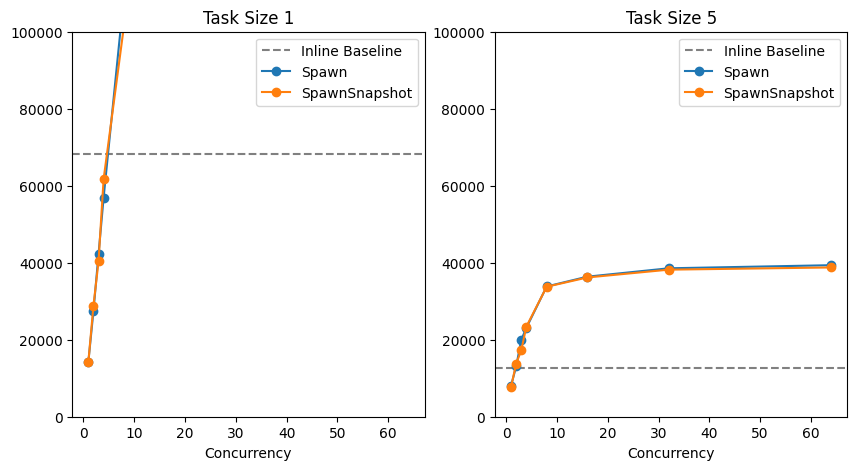

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, task_size in zip(axs, [1, 5]):
    plot_df = df.filter(pl.col("task_size") == task_size)
    baseline = plot_df.filter(pl.col("mode") == "Inline")["ops/sec"][0]
    ax.axhline(y=baseline, color='gray', linestyle='--', label='Inline Baseline')
    for mode in ["Spawn", "SpawnSnapshot"]:
        mode_df = plot_df.filter(pl.col("mode") == mode)
        ax.plot(mode_df["concurrency"], mode_df["ops/sec"], label=mode, marker='o')
    ax.set_title(f"Task Size {task_size}")
    ax.set_xlabel("Concurrency")
    ax.set_ylim(0, 100_000)
    ax.legend()


In [28]:
from math import *
log(100_000, 16), log(1_000_000, 16)

(4.152410118609203, 4.9828921423310435)